In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [5]:
model = tf.keras.models.load_model('vgg16.h5')

In [6]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [8]:
test_data = tf.keras.utils.image_dataset_from_directory('DataSet/test/',batch_size=32,
    image_size=(224, 224),color_mode='rgb')

Found 379 files belonging to 5 classes.


1.0
0.0


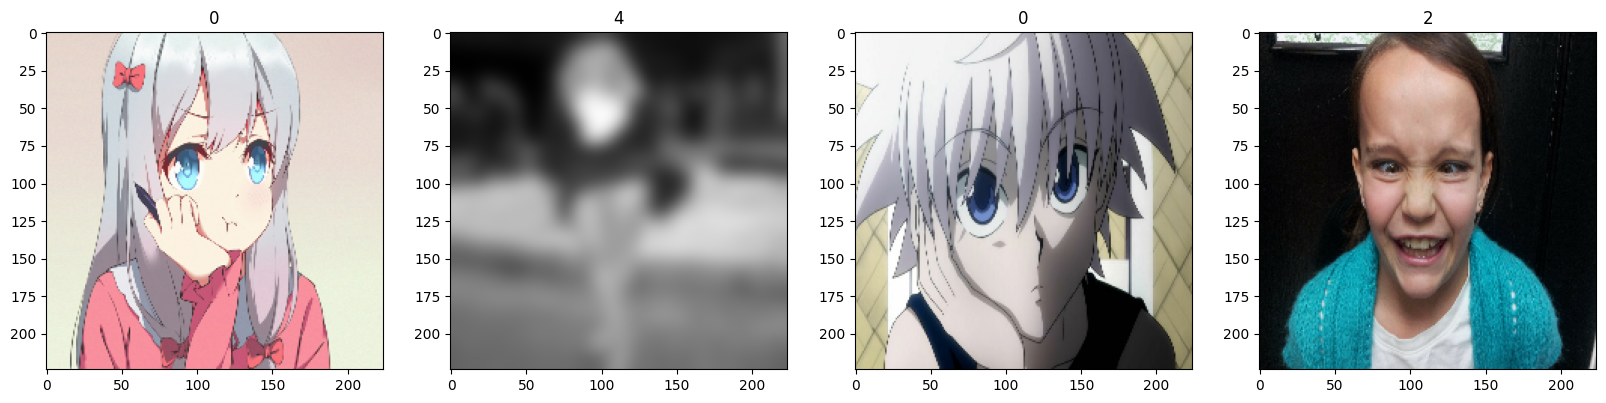

In [36]:
data = test_data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print(batch[0].max())
print(batch[0].min())
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    if batch[1][idx] == 3:
        img = gaussian_filter(img, sigma=6)
    elif batch[1][idx] == 4:
        img = gaussian_filter(img, sigma=6)
    elif batch[1][idx] == 1:
        img = gaussian_filter(img, sigma=6)
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

In [26]:
for batch in data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat,axis=1)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 9s 9s/step


In [27]:
print("Precision {}\nRecall {}\nAccuracy {}".format(pre.result().numpy(),re.result().numpy(),acc.result().numpy()))

Precision 0.9255663156509399
Recall 0.9346405267715454
Accuracy 0.3060685992240906


Note that the accuracy is relatively low. This is likely due to the fact that the data set is imbalanced, meaning that there are more negative instances than positive instances. In this case, it may be more useful to focus on the precision and recall metrics, which are both relatively high.

# F1 Score

In [29]:
precision = pre.result().numpy()
recall = re.result().numpy()

f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)

F1 Score: 0.9300812724702148
